What You're Aiming For

In this checkpoint, you are going to work on the '5G-Energy consumption' dataset that was provided by the  international telecommunication union (ITU) in 2023 as part of a global challenge or competition for data scientists all over the world to solve the 5G energy consumption modelling using machine learning techniques.

The competition is taking place from 2023-07-05 to 2023-09-30. Fore more information click here.

Checkpoint problematic : Network operational expenditure (OPEX) already accounts for around 25 percent of the total telecom operator’s cost, and 90 percent of it is spent on large energy bills. More than 70 percent of this energy is estimated to be consumed by the radio access network (RAN), particularly by the base stations (BSs). Thus, the objective is to build and train a ML model to estimate the energy consumed by different 5G base stations taking into consideration the impact of various engineering configurations, traffic conditions, and energy-saving methods.

Dataset description : This dataset is derived from the original copy and simplified for learning purposes. It includes cell-level traffic statistics of 4G/5G sites collected on different days.

➡️ Dataset link

https://i.imgur.com/Agu9zeP.jpg

 
-

Instructions

Import you data and perform basic data- exploration phase
Display general informatio-n about the dataset
Create a pandas profiling reports to gain insig-hts into the dataset
Handle Missing- and corrupted values
Remove dup-licates, if they exist
Handle -outliers, if they exist
Enc-ode categorical features
Select your target -variable and the features
Split your dataset- to training and test sets
Based on your data exploration phase select a ML regression algorithm and t-rain it on the training set
Assess your model performance on the test set using- relevant evaluation metrics
Discuss with your cohort alternative ways to improve your model performance

In [1]:
#To silence warnings,for some clearer outputs

import warnings 
warnings.filterwarnings("ignore")

## Importing necessary libraries needed


In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

## Importing the dataset given


In [13]:
energy_df = pd.read_csv(r"C:\Users\Zione\Downloads\5G_energy_consumption_dataset.csv")

## Data cleaning and overview

In [14]:
# Display the first five rows of the dataset
energy_df.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


### Deriving more information on the dataset 


In [15]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


## More statistics on the dataset

energy_df.describe(include ='all')

## Handling and looking for missing values


In [17]:
energy_df.isnull().sum()

Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64

no missing values seen in the dataset

## Remove duplicates on the dataset

In [20]:
energy_df.duplicated().sum()

0

no duplicates found in the dataset also

## Converting the Time Column to Datetime

In [25]:
energy_df['Time'] = pd.to_datetime(df['Time'], format= '%Y%m%d %H%M%S')

In [26]:
energy_df.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,2023-01-01 01:00:00,B_0,64.275037,0.487936,0.0,7.101719
1,2023-01-01 02:00:00,B_0,55.904335,0.344468,0.0,7.101719
2,2023-01-01 03:00:00,B_0,57.698057,0.193766,0.0,7.101719
3,2023-01-01 04:00:00,B_0,55.156951,0.222383,0.0,7.101719
4,2023-01-01 05:00:00,B_0,56.053812,0.175436,0.0,7.101719


In [31]:
#Extracting the year, month, day, hour, minute and second 
energy_df['Year'] = energy_df['Time'].dt.year
energy_df['Month'] = energy_df['Time'].dt.month
energy_df['Day'] = energy_df['Time'].dt.day

energy_df['Hour'] = energy_df['Time'].dt.hour
energy_df['Minute'] = energy_df['Time'].dt.minute
energy_df['Second'] = energy_df['Time'].dt.second

In [32]:
#cross_checking
energy_df.head()

,Time,BS,Energy,load,ESMODE,TXpower,Year,Month,Day,Hour,Minute,Second
0,2023-01-01 01:00:00,B_0,64.275037,0.487936,0.0,7.101719,2023,1,1,1,0,0
1,2023-01-01 02:00:00,B_0,55.904335,0.344468,0.0,7.101719,2023,1,1,2,0,0
2,2023-01-01 03:00:00,B_0,57.698057,0.193766,0.0,7.101719,2023,1,1,3,0,0
3,2023-01-01 04:00:00,B_0,55.156951,0.222383,0.0,7.101719,2023,1,1,4,0,0
4,2023-01-01 05:00:00,B_0,56.053812,0.175436,0.0,7.101719,2023,1,1,5,0,0


In [35]:
!pip install category_encoders

import category_encoders as ce

   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/82.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/82.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/82.0 kB ? eta -:--:--
   -------------- ------------------------- 30.7/82.0 kB 163.8 kB/s eta 0:00:01
   ------------------- -------------------- 41.0/82.0 kB 196.9 kB/s eta 0:00:01
   ----------------------------- ---------- 61.4/82.0 kB 252.2 kB/s eta 0:00:01
   ---------------------------------------- 82.0/82.0 kB 287.1 kB/s eta 0:00:00


## Encoding categorical features

In [38]:
energy_df['BS'].value_counts()

BS
B_583     130
B_261     128
B_728     128
B_669     128
B_512     126
         ... 
B_1018     16
B_921      14
B_905      13
B_854       1
B_835       1
Name: count, Length: 923, dtype: int64

In [40]:
energy_df['BS'].unique()

array(['B_0', 'B_1', 'B_2', 'B_3', 'B_4', 'B_5', 'B_6', 'B_7', 'B_8',
       'B_9', 'B_10', 'B_11', 'B_12', 'B_14', 'B_15', 'B_16', 'B_17',
       'B_18', 'B_19', 'B_20', 'B_21', 'B_22', 'B_23', 'B_24', 'B_25',
       'B_26', 'B_27', 'B_28', 'B_29', 'B_30', 'B_31', 'B_32', 'B_33',
       'B_34', 'B_35', 'B_36', 'B_37', 'B_38', 'B_39', 'B_40', 'B_41',
       'B_42', 'B_43', 'B_44', 'B_45', 'B_46', 'B_47', 'B_48', 'B_49',
       'B_50', 'B_51', 'B_52', 'B_53', 'B_54', 'B_55', 'B_56', 'B_57',
       'B_58', 'B_59', 'B_60', 'B_61', 'B_62', 'B_63', 'B_64', 'B_65',
       'B_66', 'B_67', 'B_68', 'B_69', 'B_70', 'B_71', 'B_72', 'B_73',
       'B_74', 'B_75', 'B_76', 'B_77', 'B_78', 'B_79', 'B_80', 'B_81',
       'B_82', 'B_83', 'B_84', 'B_85', 'B_86', 'B_87', 'B_88', 'B_89',
       'B_90', 'B_91', 'B_92', 'B_93', 'B_94', 'B_95', 'B_96', 'B_97',
       'B_98', 'B_99', 'B_100', 'B_101', 'B_102', 'B_103', 'B_104',
       'B_105', 'B_106', 'B_107', 'B_108', 'B_109', 'B_110', 'B_111',
       'B_11

The BS has too many unique values. Target Encoding allows the model to understand patterns, assigning a value from the target variable.

In [41]:
#Target Encoding
encoder = ce.TargetEncoder(cols=['BS'])
energy_df['BS_encoded'] = encoder.fit_transform(energy_df['BS'], energy_df['Energy'])
                                                
                                                

In [42]:
energy_df.head()

,Time,BS,Energy,load,ESMODE,TXpower,Year,Month,Day,Hour,Minute,Second,BS_encoded
0,2023-01-01 01:00:00,B_0,64.275037,0.487936,0.0,7.101719,2023,1,1,1,0,0,73.087415
1,2023-01-01 02:00:00,B_0,55.904335,0.344468,0.0,7.101719,2023,1,1,2,0,0,73.087415
2,2023-01-01 03:00:00,B_0,57.698057,0.193766,0.0,7.101719,2023,1,1,3,0,0,73.087415
3,2023-01-01 04:00:00,B_0,55.156951,0.222383,0.0,7.101719,2023,1,1,4,0,0,73.087415
4,2023-01-01 05:00:00,B_0,56.053812,0.175436,0.0,7.101719,2023,1,1,5,0,0,73.087415


## Correlation matrix to show the strength and the direction of linear relationships between pairs of variables in the dataset. 

In [54]:
selected_columns = ['Energy','load', 'ESMODE', 'TXpower', 'BS_encoded', 'Time', 'Day', 'Hour']
correlation_matrix = energy_df[columns].corr()

In [ ]:
correlation_matrix()

In [ ]:
print(energy_df.selected_columns)


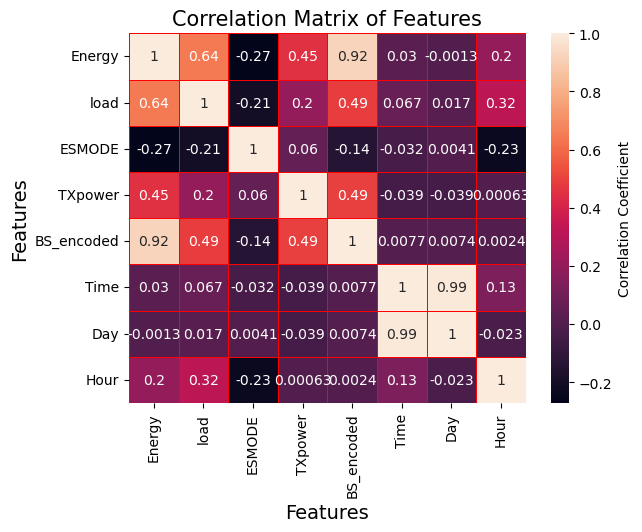

In [58]:
sns.heatmap(correlation_matrix,
            annot=True,
            linewidth=0.5,
            linecolor='red',
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Features', fontsize=15)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.show()         

### Showing the relationship between the two features..Energy and the various features


Energy and Hour: The correlation is 0.204, indicating a weak positive correlation.

Energy and Day: The correlation is 0.0013, indicating that there is no relationship between the Energy Consumption and the Day.

Energy and Time: The correlation is 0.03, indicating that linear relationship between the Energy and Time does not align.

Energy and BS_encoded: The correlation is 0.92: This indicates a strong positive correlation, it also regard BD_encoded as a strong feature in Energy Consumption.

Energy and TX power: The correlation found in both intersection is 0.45. This indicates a moderate positive correlation.

Energy and ESMODE: The correlation is 0.27, this indicates that another weak positive correlation.

Energy and load: The correlation is 0.64, indicating that a moderate positive correlation. The Traffic Load is another predictor of Energy Consumption.

## Splitting the dataset into Training and Test Sets

In [71]:
#Dropping unnecessary columns
X = energy_df.drop(columns=['Energy', 'BS', 'Year', 'Month','Day', 'Time','Minute','Second'])
#Target variable remains the same
y = df['Energy']
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2,random_state=42)
#Verifying the features
print(X_train.columns)

Index(['load', 'ESMODE', 'TXpower', 'Hour', 'BS_encoded'], dtype='object')


## Selecting a ML regression algorithm and train it on the training set

In [73]:
#Imitializing and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
#making predictions
y_pred_linear = linear_model.predict(X_test)

#Evaluate the model
print("Linear Regression")
print("MAE:", mean_absolute_error(y_test,y_pred_linear))
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("R² Score:", r2_score(y_test, y_pred_linear))

Linear Regression
MAE: 2.7504842567919368
MSE: 14.976882793435548
R² Score: 0.9210938363967964


In [74]:
#XGBOOST
## Initialize and train the model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

#Make predictions
y_pred_xgb = xgb_model.predict(X_test)

#Evaluating the model
print("XGBoost Regression")
print("MAE:", mean_absolute_error(y_test,y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R² Score:", r2_score(y_test, y_pred_xgb))

XGBoost Regression
MAE: 1.5511971272413154
MSE: 5.544545697940161
R² Score: 0.9707883919517042


In [75]:
from sklearn.tree import DecisionTreeRegressor
#Initializing and training the model
Decisiontree_model = DecisionTreeRegressor(random_state = 42)
Decisiontree_model.fit(X_train, y_train)

#Making predictions
y_pred_tree = Decisiontree_model.predict(X_test)

#Evaluating the model
print("Decision Tree Regression")
print("MAE:", mean_absolute_error(y_test,y_pred_tree))
print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("R² Score:", r2_score(y_test, y_pred_tree))


Decision Tree Regression
MAE: 1.7447697766014387
MSE: 8.197822268440413
R² Score: 0.9568095234485599


In [76]:
from sklearn.ensemble import GradientBoostingRegressor
#Initialize,and train the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

#Making predictions
y_pred_gb = gb_model.predict(X_test)

#Evaluating the model
print("Gradient Boosting Regression:")
print("MAE:", mean_absolute_error(y_test,y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("R² Score:", r2_score(y_test, y_pred_gb))

Gradient Boosting Regression:
MAE: 1.970588763756416
MSE: 8.224305651841785
R² Score: 0.9566699949357007


### XgBoost Regression has the best performance, its speed and accuracy to handle complex tasks.